In [1]:
#Inter-residue Contact Map
#python3 Plot-ContactMap.py <.pdb file> <.xtc file> contact-map.dat

In [2]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import copy as cp
import subprocess as sp
import os as os
import shutil as sh
import sys
import pandas as pd
import mdtraj as md
import matplotlib
#matplotlib.use("TkAgg")

In [3]:
! ls ALK3F4*50*map.dat

ALK3F4_Run1_50_contact_map.dat


In [4]:
ls ../../NewPeps/50/TRAJ/*pdb 

../../NewPeps/50/TRAJ/ALK3E4_Run1_50_npt_eq.pdb
../../NewPeps/50/TRAJ/ALK3F1_Run1_50_npt_eq.pdb
../../NewPeps/50/TRAJ/ALK3F2ra_Run1_50_npt_eq.pdb
../../NewPeps/50/TRAJ/ALK3F2_Run1_50_npt_eq.pdb
../../NewPeps/50/TRAJ/ALK3F4_Run1_50_npt_eq.pdb
../../NewPeps/50/TRAJ/ALK3Y4_Run1_50_npt_eq.pdb


In [5]:
ref_structure="../../NewPeps/50/TRAJ/ALK3F4_Run1_50_npt_eq.pdb"
inp          ="ALK3F4_Run1_50_contact_map.dat"
Name         ="ALK3F4_50"


In [6]:
#structure parameters
topology   = md.load(ref_structure).topology
#trajectory = md.load(traj, top=ref_structure)
#frames     =trajectory.n_frames #Number of frames
#chains     =topology.n_chains   #Number of chains
chains     =50
atoms      =int(topology.n_atoms) #Number of atoms in each monomer 
AminoAcids =int(topology.n_residues/chains)#Number of residues per chain

In [7]:
#! more ALKPep4_protein_chainID.pdb
chains, AminoAcids, atoms

(50, 16, 2300)

In [8]:
isum=1
atoms_list=[]
residue_list=[]

for residue in topology.chain(0).residues:
    atoms_list.append(residue.n_atoms)
    residue_list.append(residue)
    ', '.join(map(lambda x: "'" + x + "'", str(residue_list)))
#del residue_list[0]; del residue_list[-1] 


In [9]:
Norm_ContactMap = np.loadtxt(inp)

In [10]:
vmax=np.max(Norm_ContactMap)
vmin=np.min(Norm_ContactMap)

vmax
vmin

1.1154116426667261e-05

In [11]:
df=np.amax(Norm_ContactMap)
df

0.0035135466744001874

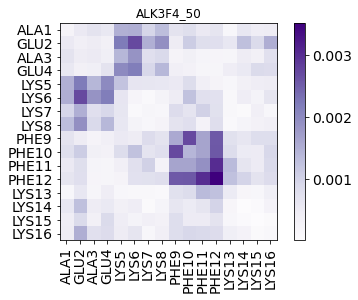

In [12]:
fig, ax = plt.subplots()

df=np.amax(Norm_ContactMap)
im=ax.imshow(Norm_ContactMap, vmin=vmin, vmax=vmax, cmap = 'Blues')
im.set_cmap('Purples')
plt.title(Name)

ticks = range(AminoAcids)
plt.xticks(list(ticks), labels=residue_list,rotation='vertical', fontsize=14)
plt.yticks(list(ticks), labels=residue_list, fontsize=14)
#cbar=plt.colorbar(cmap='Blues', boundaries=np.arange(0.0, vmax+0.1, 0.1))
#cbar=plt.cm.ScalarMappable(cmap='Blues')
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=14) 

plt.savefig(Name+'_Contact_map.png', dpi=400, bbox_inches='tight')
plt.show()